In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
selected_assets = "GOOG,JPM,FB".split(",")
a1, a2, a3 = selected_assets
selected_assets

['GOOG', 'JPM', 'FB']

In [3]:
portfolio = optimize_portfolio(selected_assets, 1000)
portfolio

[0] Retrieving Stock Data: GOOG
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FB

Optimizing Portfolio Weights >> Simulations: x 1000

Optimized Portfolio Weights:
FB          0.8843
GOOG        0.0009
JPM         0.1148
Return      0.2180
Sharpe      0.4973
Variance    0.2413
Name: 752, dtype: float64


{'FB': 0.8843,
 'GOOG': 0.0009,
 'JPM': 0.1148,
 'Return': 0.218,
 'Sharpe': 0.4973,
 'Variance': 0.2413}

In [4]:
performance = backtest_portfolio(portfolio)
performance.head(10)


Ticker: FB 	Portfolio Weight: 0.8843
                  FB
Date                
2014-01-03 -0.002476
2014-01-06  0.041834
2014-01-07  0.011062
2014-01-08  0.004720
2014-01-09 -0.015473

Ticker: GOOG 	Portfolio Weight: 0.0009
                    GOOG
Date                    
2014-03-28  2.462338e-06
2014-03-31 -4.866793e-06
2014-04-01  1.631707e-05
2014-04-02 -2.539324e-07
2014-04-03  4.338731e-06

Ticker: JPM 	Portfolio Weight: 0.1148
                 JPM
Date                
2014-01-03  0.000884
2014-01-06  0.000663
2014-01-07 -0.001331
2014-01-08  0.001078
2014-01-09 -0.000215

[Historic] Portfolio Performance:
                   FB          GOOG       JPM      RTNp
Date                                                  
2014-03-28 -0.014034  2.462338e-06  0.000230 -0.013802
2014-03-31  0.003383 -4.866793e-06  0.001274  0.004652
2014-04-01  0.034265  1.631707e-05 -0.000076  0.034206
2014-04-02  0.001411 -2.539324e-07 -0.000360  0.001051
2014-04-03 -0.046755  4.338731e-06  0.000341 -0.

,FB,GOOG,JPM,RTNp
Date,,,,
2014-03-28,-0.014034,2.462338e-06,0.000230,-0.013802
2014-03-31,0.003383,-4.866793e-06,0.001274,0.004652
2014-04-01,0.034265,1.631707e-05,-0.000076,0.034206
2014-04-02,0.001411,-2.539324e-07,-0.000360,0.001051
2014-04-03,-0.046755,4.338731e-06,0.000341,-0.046409
2014-04-04,-0.041713,-4.303170e-05,-0.001620,-0.043376
2014-04-07,0.003127,-8.306804e-06,-0.001565,0.001553
2014-04-08,0.019049,2.758553e-05,-0.000292,0.018785
2014-04-09,0.061910,1.486308e-05,0.000816,0.062741


In [5]:
performance.head()

,FB,GOOG,JPM,RTNp
Date,,,,
2014-03-28,-0.014034,2.462338e-06,0.000230,-0.013802
2014-03-31,0.003383,-4.866793e-06,0.001274,0.004652
2014-04-01,0.034265,1.631707e-05,-0.000076,0.034206
2014-04-02,0.001411,-2.539324e-07,-0.000360,0.001051
2014-04-03,-0.046755,4.338731e-06,0.000341,-0.046409


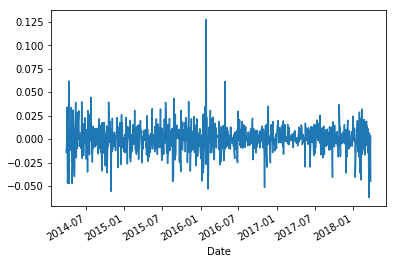

In [6]:
performance["FB"].plot()

In [7]:
# Validate Data Type -- Series
portfolio_daily_returns = performance["RTNp"]
type(portfolio_daily_returns) is pd.core.series.Series

True

In [8]:
asset1_performance = closing_prices(a1).set_index("Date")
print(asset1_performance.count())
asset1_performance["n_close"] = round(asset1_performance[a1]/asset1_performance[a1].iloc[0] -1, 4)
asset1_performance.head()

GOOG    1007
dtype: int64


,GOOG,n_close
Date,,
2014-03-27,558.46,0.0000
2014-03-28,559.99,0.0027
2014-03-31,556.97,-0.0027
2014-04-01,567.16,0.0156
2014-04-02,567.00,0.0153


In [9]:
asset2_performance = closing_prices(a2).set_index("Date")
print(asset2_performance.count())
asset2_performance["n_close"] = round(asset2_performance[a2]/asset2_performance[a2].iloc[0] -1, 4)
asset2_performance.head()

JPM    1065
dtype: int64


,JPM,n_close
Date,,
2014-01-02,58.21,0.0000
2014-01-03,58.66,0.0077
2014-01-06,59.00,0.0136
2014-01-07,58.32,0.0019
2014-01-08,58.87,0.0113


In [10]:
asset3_performance = closing_prices(a3).set_index("Date")
print(asset3_performance.count())
asset3_performance["n_close"] = round(asset3_performance[a3]/asset3_performance[a3].iloc[0] -1, 4)
asset3_performance.head()

FB    1065
dtype: int64


,FB,n_close
Date,,
2014-01-02,54.710,0.0000
2014-01-03,54.557,-0.0028
2014-01-06,57.200,0.0455
2014-01-07,57.920,0.0587
2014-01-08,58.230,0.0643


In [11]:
portfolio_daily_returns.head()

Date
2014-03-28   -0.013802
2014-03-31    0.004652
2014-04-01    0.034206
2014-04-02    0.001051
2014-04-03   -0.046409
Name: RTNp, dtype: float64

In [12]:
for d, rtn in portfolio_daily_returns.items():
    print(f'Date:{d} / %Change: {round(rtn * 100, 2)}%')

Date:2014-03-28 00:00:00 / %Change: -1.38%
Date:2014-03-31 00:00:00 / %Change: 0.47%
Date:2014-04-01 00:00:00 / %Change: 3.42%
Date:2014-04-02 00:00:00 / %Change: 0.11%
Date:2014-04-03 00:00:00 / %Change: -4.64%
Date:2014-04-04 00:00:00 / %Change: -4.34%
Date:2014-04-07 00:00:00 / %Change: 0.16%
Date:2014-04-08 00:00:00 / %Change: 1.88%
Date:2014-04-09 00:00:00 / %Change: 6.27%
Date:2014-04-10 00:00:00 / %Change: -5.1%
Date:2014-04-11 00:00:00 / %Change: -1.38%
Date:2014-04-14 00:00:00 / %Change: 0.47%
Date:2014-04-15 00:00:00 / %Change: 0.27%
Date:2014-04-16 00:00:00 / %Change: 1.04%
Date:2014-04-17 00:00:00 / %Change: -1.17%
Date:2014-04-21 00:00:00 / %Change: 3.34%
Date:2014-04-22 00:00:00 / %Change: 2.71%
Date:2014-04-23 00:00:00 / %Change: -2.33%
Date:2014-04-24 00:00:00 / %Change: -0.68%
Date:2014-04-25 00:00:00 / %Change: -4.82%
Date:2014-04-28 00:00:00 / %Change: -2.48%
Date:2014-04-29 00:00:00 / %Change: 3.24%
Date:2014-04-30 00:00:00 / %Change: 2.42%
Date:2014-05-01 00:00:00 

Date:2018-01-17 00:00:00 / %Change: -0.32%
Date:2018-01-18 00:00:00 / %Change: 1.12%
Date:2018-01-19 00:00:00 / %Change: 0.71%
Date:2018-01-22 00:00:00 / %Change: 2.1%
Date:2018-01-23 00:00:00 / %Change: 1.87%
Date:2018-01-24 00:00:00 / %Change: -1.17%
Date:2018-01-25 00:00:00 / %Change: 0.44%
Date:2018-01-26 00:00:00 / %Change: 1.24%
Date:2018-01-29 00:00:00 / %Change: -1.9%
Date:2018-01-30 00:00:00 / %Change: 0.43%
Date:2018-01-31 00:00:00 / %Change: -0.05%
Date:2018-02-01 00:00:00 / %Change: 3.0%
Date:2018-02-02 00:00:00 / %Change: -1.56%
Date:2018-02-05 00:00:00 / %Change: -4.19%
Date:2018-02-06 00:00:00 / %Change: 1.62%
Date:2018-02-07 00:00:00 / %Change: -2.41%
Date:2018-02-08 00:00:00 / %Change: -4.86%
Date:2018-02-09 00:00:00 / %Change: 2.49%
Date:2018-02-12 00:00:00 / %Change: 0.39%
Date:2018-02-13 00:00:00 / %Change: -1.58%
Date:2018-02-14 00:00:00 / %Change: 3.46%
Date:2018-02-15 00:00:00 / %Change: 0.27%
Date:2018-02-16 00:00:00 / %Change: -1.37%
Date:2018-02-20 00:00:00 / 

In [13]:
def convert_daily_portfolio_value(daily_returns, verbose=True):
    data_type = type(daily_returns)
    if data_type is pd.core.series.Series:
        portfolio_start_value = 1
        eod_portfolio_values = [(0, portfolio_start_value)]
        
        for d, pct_return in daily_returns.items():
            daily_open_value = eod_portfolio_values[-1][1]
            daily_close_value = round(daily_open_value * (1 + pct_return), 6)
            eod_portfolio_values.append((d, daily_close_value))
            if verbose:
                print(f'date: {d},\t' 
                      f'open: {daily_open_value},\t'
                      f'%rtn: {round(pct_return, 6)}\t'
                      f'close: {daily_close_value}')
                
        portfolio_mkt_values = pd.DataFrame(eod_portfolio_values[1:], columns=["date","mkt_val"]).set_index("date")
        portfolio_mkt_values["n_value"] = portfolio_mkt_values["mkt_val"].apply(lambda x: x-1)
        return portfolio_mkt_values

In [14]:
portfolio_closing_values = convert_daily_portfolio_value(portfolio_daily_returns)
type(portfolio_closing_values)

date: 2014-03-28 00:00:00,	open: 1,	%rtn: -0.013802	close: 0.986198
date: 2014-03-31 00:00:00,	open: 0.986198,	%rtn: 0.004652	close: 0.990786
date: 2014-04-01 00:00:00,	open: 0.990786,	%rtn: 0.034206	close: 1.024676
date: 2014-04-02 00:00:00,	open: 1.024676,	%rtn: 0.001051	close: 1.025753
date: 2014-04-03 00:00:00,	open: 1.025753,	%rtn: -0.046409	close: 0.978148
date: 2014-04-04 00:00:00,	open: 0.978148,	%rtn: -0.043376	close: 0.93572
date: 2014-04-07 00:00:00,	open: 0.93572,	%rtn: 0.001553	close: 0.937173
date: 2014-04-08 00:00:00,	open: 0.937173,	%rtn: 0.018785	close: 0.954777
date: 2014-04-09 00:00:00,	open: 0.954777,	%rtn: 0.062741	close: 1.014681
date: 2014-04-10 00:00:00,	open: 1.014681,	%rtn: -0.05101	close: 0.962922
date: 2014-04-11 00:00:00,	open: 0.962922,	%rtn: -0.013764	close: 0.949669
date: 2014-04-14 00:00:00,	open: 0.949669,	%rtn: 0.004718	close: 0.954149
date: 2014-04-15 00:00:00,	open: 0.954149,	%rtn: 0.00267	close: 0.956697
date: 2014-04-16 00:00:00,	open: 0.956697,	%

date: 2015-08-27 00:00:00,	open: 1.312801,	%rtn: 0.028236	close: 1.349869
date: 2015-08-28 00:00:00,	open: 1.349869,	%rtn: 0.01189	close: 1.365919
date: 2015-08-31 00:00:00,	open: 1.365919,	%rtn: -0.015558	close: 1.344668
date: 2015-09-01 00:00:00,	open: 1.344668,	%rtn: -0.026903	close: 1.308492
date: 2015-09-02 00:00:00,	open: 1.308492,	%rtn: 0.028661	close: 1.345995
date: 2015-09-03 00:00:00,	open: 1.345995,	%rtn: -0.017096	close: 1.322985
date: 2015-09-04 00:00:00,	open: 1.322985,	%rtn: -0.001087	close: 1.321547
date: 2015-09-08 00:00:00,	open: 1.321547,	%rtn: 0.015712	close: 1.342311
date: 2015-09-09 00:00:00,	open: 1.342311,	%rtn: 0.007145	close: 1.351901
date: 2015-09-10 00:00:00,	open: 1.351901,	%rtn: 0.015826	close: 1.373297
date: 2015-09-11 00:00:00,	open: 1.373297,	%rtn: 0.000496	close: 1.373978
date: 2015-09-14 00:00:00,	open: 1.373978,	%rtn: 0.00216	close: 1.376946
date: 2015-09-15 00:00:00,	open: 1.376946,	%rtn: 0.007838	close: 1.387739
date: 2015-09-16 00:00:00,	open: 1.3

pandas.core.frame.DataFrame

In [15]:
print(portfolio_closing_values.count())
portfolio_closing_values.head()

mkt_val    1006
n_value    1006
dtype: int64


,mkt_val,n_value
date,,
2014-03-28,0.986198,-0.013802
2014-03-31,0.990786,-0.009214
2014-04-01,1.024676,0.024676
2014-04-02,1.025753,0.025753
2014-04-03,0.978148,-0.021852


In [16]:
portfolio_closing_values["mkt_val"] = portfolio_closing_values["mkt_val"].apply(lambda x: x -1)
portfolio_closing_values.head()

,mkt_val,n_value
date,,
2014-03-28,-0.013802,-0.013802
2014-03-31,-0.009214,-0.009214
2014-04-01,0.024676,0.024676
2014-04-02,0.025753,0.025753
2014-04-03,-0.021852,-0.021852


In [17]:
type(portfolio_closing_values)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Mkt Value')

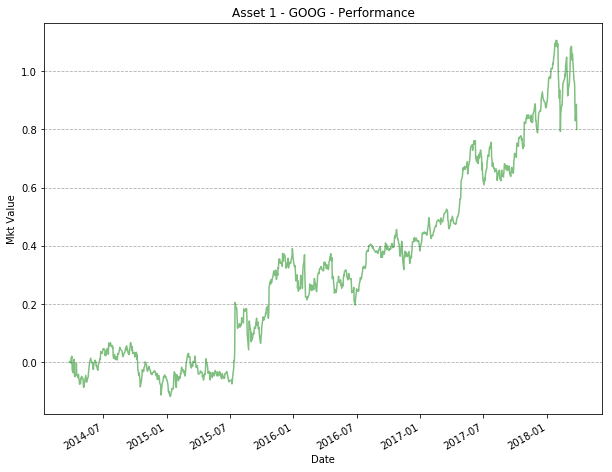

In [18]:
asset1_performance["n_close"].plot(color="green", alpha=0.5, figsize=(10, 8))
plt.grid(axis="y", linestyle="dashed")
plt.title(f"Asset 1 - {a1} - Performance")
plt.xlabel("Date")
plt.ylabel("Mkt Value")

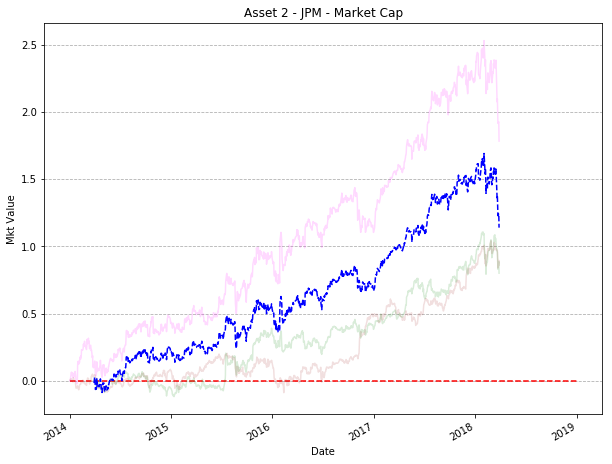

In [24]:
asset2_performance["n_close"].plot(color="brown", alpha=0.15, figsize=(10, 8))
plt.plot(asset1_performance["n_close"], color="green", alpha=0.15)
plt.plot(asset3_performance["n_close"], color="magenta", alpha=0.15)
plt.plot(portfolio_closing_values["n_value"], color="blue", linestyle="dashed")
plt.grid(axis="y", linestyle="dashed")
plt.title(f"Asset 2 - {a2} - Market Cap")
plt.xlabel("Date")
plt.ylabel("Mkt Value")
plt.hlines(0, "2014-01", "2019-01", color="red", linestyle="dashed")

In [ ]:
asset2_performance["n_close"].plot(color="magenta", alpha=0.5, figsize=(10, 8))
plt.grid(axis="y", linestyle="dashed")
plt.title(f"Asset 3 - {a3} - Market Cap")
plt.xlabel("Date")
plt.ylabel("Mkt Value")

In [ ]:
portfolio_closing_values.plot(color="red", linestyle="dashed", figsize=(10,8))
asset1_performance["n_close"].plot(color="green", alpha=0.5)
plt.grid(axis="y", linestyle="dashed")
plt.title("Portfolio Daily Value")
plt.ylabel("Portfolio Value")
plt.xlabel("Date")